### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

--The Independent Variable is the variable that can be changed and manipulated during the experiment; it is a variable that is used to hypothesize to a cause or predict another variable. The independent variable here in the Stroop Effect Studies are using words' color, names of the colors that match and does not match to each other.-- 

--The Dependent Variable is the variable that is recorded or measured. It is also used to hypothesized to be influenced by the cause variable or to be the result of another variable. It always depends on another variable. It is also called a response variable, effect variable or outcome variable, and output variable. The dependent variable here in the Stroop Effect Studies are timing that are recorded during the 'word-colors' reading. --


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

***A) small sample: it consists 24 participants in the experiment
B) Same participants tested in 2 different exercises- Congruent and Incongruent
C)
-$$H_0: \mu_{Incongruent} - \mu_{Congruent} = 0$$- 
-$$H_1: \mu_{Incongruent} - \mu_{Congruent} \ne 0$$-

Null hypotheses(Ho): The null hypothesis is that the mean difference between paired observations is zero. When the mean difference is zero, the means of the two groups must also be equal. Because of the paired design of the data, the null hypothesis of a paired t–test is usually expressed in terms of the mean difference(biostathandbook.com).

source:http://www.biostathandbook.com/pairedttest.html

Alternative hypotheses(H1): The optionalternative is a character string specifying the alternative hypothesis, and must be one of the following: "two.sided" (which is the default), "greater" or "less" depending on whether the alternative hypothesis is that the mean is different than, greater than or less than mu, respectively(stat.columbia.edu -page 1). 

source: http://www.stat.columbia.edu/~martin/W2024/R2.pdf

D) "[The two tails method] is used when a study hopes to compare two variables in individuals of the population to draw some sort of conclusion about the observed correlation. When observing these data points, the order of the pairing is important because the first number is a measure of one thing while the second is a measure of something entirely different" (thoughtco.com).
source: https://www.thoughtco.com/what-is-paired-data-3126311

I can assume that the distribution of the mean difference is normal.
The mean difference will follow a normal distribution if the samples are drawn from a population of differences with a normal distribution. If the unpaired observations are not normal the fact they are differences will have a slight normalizing effect since a difference between two observations is equivalent to a mean of two observations in terms of central limit theorem. But even if the parent population is not normal, the differences will tend towards normality as sample size increases.

source: http://influentialpoints.com/Training/paired_t-test-principles-properties-assumptions.htm

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
np.random.seed(42)

In [2]:
df = pd.read_csv('stroopdata.csv')

In [3]:
df.describe().head()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750


In [4]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [5]:
df.mode().head(1)

,Congruent,Incongruent
0,8.63,15.687


--mean : Congruent = 14.0511, Incongruent = 22.0159--

--median: Congruent = 14.3565, Incongruent = 21.0175--

--mode: Congruent =8.630 , Incongruent = 15.687--

--Varience : Congruent = 12.6690 , Incongruent = 23.0118--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [6]:
# Build the visualizations here
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    congruent_mean = b_samp['Congruent'].mean()
    incongruent_mean = b_samp['Incongruent'].mean()
    diffs.append(incongruent_mean - congruent_mean)# create sampling distribution of difference in average

In [7]:
diffs = np.array(diffs)
diffs#convert

array([ 7.38308333,  8.87625   ,  8.8505    , ...,  6.63508333,
        6.83404167,  8.51770833])

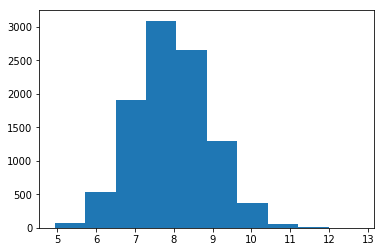

In [8]:
plt.hist(diffs);# plot sampling distribution


In [9]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
obs_diff = incongruent_mean - congruent_mean


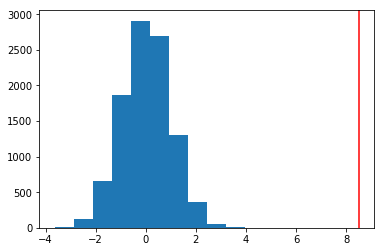

In [10]:
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [11]:
(null_vals > obs_diff).mean()

0.0

--The shape of the histogram is very symmetrical, shaped like a bell curve. If the p-value is less than alpha 0.05, we reject the null hypothesis; therefore it is statistically significant. --

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [12]:
# Perform the statistical test here
#t-statistics calculation attempt
from scipy import stats #scipy method

In [13]:
#-----scipy method

source : https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html

In [19]:
tstat= stats.ttest_rel(df['Congruent'],df['Incongruent'])
tstat

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [21]:
n = 24

https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic

In [24]:
p = stats.t.sf(np.abs(tstat), n-1)*2
p

array([  4.10300059e-08,   9.99999968e-01])

In [ ]:
#-------------------------Confidence Interval#

In [ ]:
sample_data = df.sample()

In [ ]:
diffs_01 = []
for _ in range(10000):
    bootsamp = df.sample(200, replace = True)
    Congruent_mean = bootsamp['Congruent'].mean()
    Incongruent_mean = bootsamp['Incongruent'].mean()
    diffs_01.append(Congruent_mean - Incongruent_mean)

In [ ]:
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

Note: The t-statistic that results from a two-tailed, t-test of the average time of Congruent and Incongruent is 8.3969.
I am 99.5 % confident that the interval (5.6197, 10.5530) captured the true mean. Additionally, the p value is lower than the alpha 0.05. Therefore, it has rejected the null hypotheses.--it is statistically significant. 

Based on the confidence interval, you have the evidence that the mean of Incongruent is larger than the mean of Congruent. Yes, it matches my expectation because the 'incongruent' words slow me down when I am trying to name the ink colors. 


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I could presume that we are used  to reading the name of the colors. If we train our brain and change our habits to say the word of the color instead of reading them-- I am sure we could have better speed performance. 